# Predicción de juegos

Un club de juego de Go recopiló los resultadso de varias partidas entre diferentes jugadores, almacenados en el archivo "partidas_entrenamiento.txt", con el objetivo de predecir el resultado de partidas futuras, ejemplos de las cuales se encuentran en el archivo "partidas_prueba.txt". Los archivos "partidas_entrenamiento.txt" y "partidas_prueba.txt" contienen 3 columnas: la primera corresponde al identificador del jugador A, la segunda al identificador del jugador B y la tercera al resultado del partida (1 si ganó el jugador A o 0 si ganó el jugador B). En el club hay un total de D jugadores, por lo que cada identificador es un número entero entre 1 y D. La predicción del resultado de un juego se puede plantear como un problema de clasificación: dados 2 jugadores (A y B) se requieres predecir si A ganó (y = 1) o si fue B (y = 0). Realice los siguientes ejercicios:

* Entrena y evalúa un clasificador bayesiano ingenuo. Al ser un modelo generativo (modela la probabilidad conjunta P(x,y)), es posible generar partidas artificiales con los parámetros calculados. Genera nuevas partidas que sigan la distribución modelada.
* Entrena y evalúa un clasificador de regresión logística. Para esto es necesraio reparametrizar las entradas. Explica el procedimiento y la lógica de la reparametrización que realizaste. La Seleccona y visualiza los balores de los parámetros. Gragica las curvas ROC y de precisión-exhaustividad y reporta sus áreas bajo la curva.
* Compara el clasificador bayesiano ingenuo y regresión logística en este problema. ¿Qué ventajas y desventajas tienen los modelos entrenados? ¿Qué pasaría si se entrena el clasificador bayesiano ingenuo con los vectores reparametrizados o si se entran un modelo de regresión logística usando los vectores de entrada originales? ¿Consideras que las presuposiciones de cada clasificador son apropiadas para los datos del problema? ¿Para este tipo de problemas cuál de los dos recomendarías y por qué?
* Deriva la regla de actualización para el algoritmo del descenso por gradiente de un clasificador donde y=sigm($\theta^T$x) y la función de pérdida sea:

$E(\theta) = \frac{1}{2} \sum(\acute(y) - y)^2$

Discute las diferencias entre este clasificador y el de regresión lógistica y compara sus rendimientos en la tarea de predicción de juegos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, auc, precision_recall_curve

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
 url_train = 'https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/partidas_entrenamiento.csv'
 url_valid = 'https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/partidas_prueba.csv'

df_train = pd.read_csv(url_train)
df_valid = pd.read_csv(url_valid)

df_train.describe()
df_valid.describe()

,id_blancas,id_negras,ganador
count,115.000000,115.000000,115.000000
mean,53.017391,50.713043,0.713043
std,33.675954,33.428312,0.454321
min,4.000000,4.000000,0.000000
25%,28.000000,35.000000,0.000000
50%,43.000000,43.000000,1.000000
75%,67.000000,56.000000,1.000000
max,132.000000,136.000000,1.000000


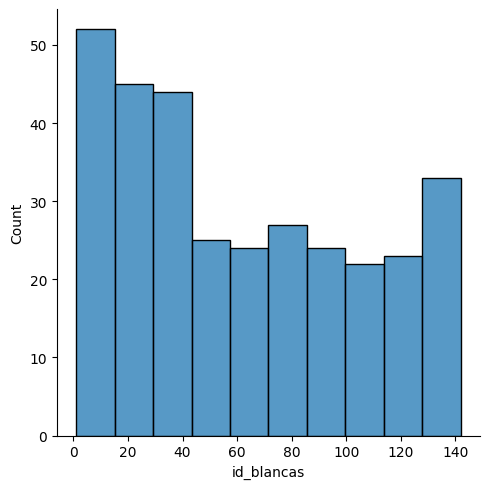

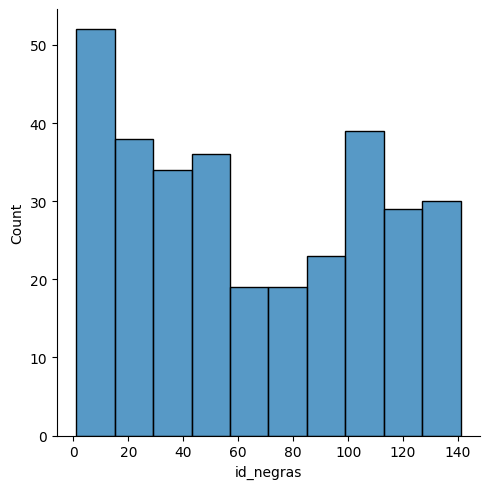

In [ ]:
sns.displot(df_train['id_blancas'])
sns.displot(df_train['id_negras'])

In [ ]:
X_train = df_train.loc[:, df_train.columns != 'ganador']
Y_train = df_train['ganador']

X_test = df_valid.loc[:, df_valid.columns != 'ganador']
Y_test = df_valid['ganador']


## Clasificador Bayesiano Ingenuo
* Entrena y evalúa un clasificador bayesiano ingenuo. Al ser un modelo generativo (modela la probabilidad conjunta $P(x,y)$), es posible generar partidas artificiales con los parámetros calculados. Genera nuevas partidas que sigan la distribución modelada.

## Entrenamiento y evaluación

In [ ]:
# probaremos diferentes distribuciones para naive bayes y seleccionaremos el mejor

def test_classifier(classifier, x_train, y_train, x_test, y_test):
  model = classifier
  model.fit(x_train, y_train)

  y_train_m = np.mean(y_train == model.predict(x_train))
  y_test_m = np.mean(y_test == model.predict(x_test))

  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred,  average="binary", pos_label = 1)
  recall = recall_score(y_test, y_pred, average ="binary", pos_label = 1)

  # print de resultados
  print('\nPerformance para: ', classifier)
  print(f'Para el conjunto de entrenamiento: {y_train_m*100:.2f}%')
  print(f'Para el conjunto de prueba: {y_test_m*100:.2f}%')
  print("Accuracy_score: ", accuracy)
  return model, accuracy

In [ ]:
to_test =[ BernoulliNB(), MultinomialNB(), GaussianNB(), CategoricalNB()]
accuracys = []
models = [ ]

for i in range(len(to_test)):
  print("Id classificador: ", i)
  classifier = to_test[i]
  model, accuracy = test_classifier(classifier, X_train, Y_train, X_test, Y_test)
  models.append(model)
  accuracys.append(accuracy)
  print("\n")

Id classificador:  0

Performance para:  BernoulliNB()
Para el conjunto de entrenamiento: 52.35%
Para el conjunto de prueba: 71.30%
Accuracy_score:  0.7130434782608696


Id classificador:  1

Performance para:  MultinomialNB()
Para el conjunto de entrenamiento: 56.11%
Para el conjunto de prueba: 47.83%
Accuracy_score:  0.4782608695652174


Id classificador:  2

Performance para:  GaussianNB()
Para el conjunto de entrenamiento: 55.80%
Para el conjunto de prueba: 66.96%
Accuracy_score:  0.6695652173913044


Id classificador:  3

Performance para:  CategoricalNB()
Para el conjunto de entrenamiento: 84.64%
Para el conjunto de prueba: 69.57%
Accuracy_score:  0.6956521739130435




Podemos ver que Bernoulli tiene un mejor performance para el conjunto de entrenamiento, sin embargo para el conjunto de prueba disminuyé demasiado, en cambio, el clasificador con distribución categorica tiene un performance similar en ambos conjuntos por lo que generaliza mejor y lo elegirimos para generar partidas.

## Generación de partidas

In [ ]:
# setting the best model to perform new games
model = models[3]

In [ ]:
def genera_jugadas(n_partidas, modelo):
  #get probability by class
  proba_by_class = np.exp(model.class_log_prior_)

  #get log probability by feature
  feature_log_prob = model.feature_log_prob_

  # classes
  clases = model.classes_

  juegos = np.zeros((n_partidas, clases.shape[0] +1 ), dtype=int)

  for partida in range(n_partidas):
    # select a winer given probabilty by class (id blancas or id negras)
    ganador = np.random.choice(clases, p = proba_by_class)
    juegos[partida][2] = ganador

    #seleccionamos dos jugadores dada la probabilodad P(x_i|y)
    for i in range(len(feature_log_prob)):
      feature_prob = np.exp(feature_log_prob[i])[ganador,:]
      jugador = np.random.choice( np.arange(len(feature_prob)), p = feature_prob)
      juegos[partida][i] = jugador
  return juegos

In [ ]:
juegos = genera_jugadas(100, model);

format_row =  "{:>10} {:>10} {:>10}"
print(format_row.format(*[ "Player1", "Player2", "Result"] ))
for row in juegos:
    print(format_row.format(*row))

   Player1    Player2     Result
        12         39          1
        26        140          0
        36        133          0
        15         32          1
         4         14          0
       123         32          1
        47         73          0
        42         63          0
        18         65          0
        95         95          0
        64         67          0
        91        133          1
       125        122          1
        78        105          1
        44        123          0
        15        130          1
        54         43          1
       105         49          0
        39         45          1
        14         22          1
        83        118          1
       139         34          0
         5         44          1
       102         65          1
       105         23          0
        24         73          0
        80        135          1
        14        133          1
        20         83          1
        18

In [ ]:
juegos = genera_jugadas(200, model);
df_juegos = pd.DataFrame(juegos, columns = df_train.columns.to_list())

#evualuando las jugadas aleatorias
model.score(df_juegos.loc[:, df_juegos.columns != 'ganador'], df_juegos['ganador'])

0.75

Notemos que el accuracy de nuestas partidas artificiales tiene un resultado similar, aunque ligeramente más alta que al conjunto de prueba.



# Entrena y evalúa un clasificador de regresión logística

Para esto es necesario cambiar la codificación de las entradas. Explica el procedimiento y la lógica de la codificación que realizaste. Visualiza los valores de los parámetros del modelo de regresión logística y discute qué
interpretación tendrían de acuerdo a la codificación realizada. Grafica las curvas ROC y de precisión-exhaustividad y reporta sus áreas bajo la curva.

## Dummy variable in logistic regression
En los modelos de regresión logística, codificar todas las variables independientes como variables ficticias o Dummy  facilita la interpretación y el cálculo de las odds ratio, y aumenta la estabilidad y la significación de los coeficientes.

La codificación dummy nos permite convertir las categorías en algo que una regresión pueda tratar como si tuvieran una puntuación alta (1) y baja (0). Se puede pensar que cualquier variable binaria tiene direccionalidad, porque si es más alta, es la categoría 1, pero si es más baja, es la categoría 0. Esto permite que la regresión mire la direccionalidad comparando dos lados, en lugar de esperar que cada unidad se corresponda con algún tipo de aumento. Para dar a la regresión algo con lo que trabajar, podemos hacer una columna separada, o variable, para cada categoría. En esta columna $n$ aparecerá un 1 si la categoría $n$ está presente para la muestra $i$

In [ ]:
def cross_entropy(q, y):
  q[q==0] = np.nextafter(0,1)
  q[q==1] = np.nextafter(1,0)
  return np.sum(-np.log(q[np.nonzero(y)]))

def softmax(z):
    e_z = np.exp(z - np.max(z, axis = 1)[:, np.newaxis])
    norm = np.sum(e_z, axis = 1)
    return e_z / norm[:, np.newaxis]

def gradiente(X, Y, Q):
  return X.T @  (Q - Y)

def gradient_descent(X, y, n_iter, tasa_ap):
  n_ej = X.shape[0]
  n_attributes = X.shape[1]
  n_clases = np.unique(y).size
  classes = np.unique(y)

  # Codifica clases con vectores 1-de-K
  Y_ohe = np.zeros((n_ej, n_clases))
  #y_where = np.array([np.argwhere(classes == i)[0] for i in y]).T[0]
  #Y_ohe[np.arange(n_ej), y_where] = 1
  Y_ohe[np.arange(n_ej), y] = 1
  #print(Y_ohe)

  # Inicializa parámetros de forma aleatoria ("LeCun uniform")
  lim = np.sqrt(1 / n_attributes)
  parametros = np.random.uniform(-lim, lim, size=(n_attributes, n_clases))

  ecc = []
  for it in range(n_iter):
    Q = softmax(X @ parametros)
    parametros -= tasa_ap * gradiente(X, Y_ohe, Q)
    ecc.append(cross_entropy(Q, Y_ohe))

  return parametros, ecc

In [ ]:
class LogisticRegression:

    def __init__(self, n_iter, alpha, scaler = MinMaxScaler()):
        self.n_iter = n_iter
        self.alpha = alpha
        self.scaler = scaler

    def add_desing_matrix(self, X):
      #crea matriz de diseño para X
        ones_X = np.ones((X.shape[0], 1))
        return np.column_stack((ones_X, X))


    def fit(self, X_train, y_train):
        X_train_sc = X_train #self.scaler.fit_transform(X_train)
        X_train_sc = self.add_desing_matrix(X_train_sc)
        self.n = X_train_sc.shape[0]
        self.n_attributes = X_train_sc.shape[1]
        self.classes = np.unique(y_train)
        self.n_classes = len(self.classes)
        self.parameters, errores = gradient_descent(X_train_sc, y_train, self.n_iter, self.alpha)
        return errores

    def predict(self, X):
        X_sc = X#self.scaler.transform(X)
        X_sc = self.add_desing_matrix(X_sc)
        likelihood = softmax(X_sc @ self.parameters)
        prediction = np.argmax(likelihood, axis=1)
        y_predict = np.zeros_like(prediction)
        for i, p in enumerate(prediction):
            y_predict[i] = self.classes[p]
        return y_predict

    def predict_proba(self, X):
        X_sc = X#self.scaler.transform(X)
        X_sc = self.add_desing_matrix(X_sc)
        return softmax(X_sc @ self.parameters)

    def score(self, X, y):
        y_predict = self.predict(X)
        return np.mean(y == y_predict)

### Codificación
Usaremos one hot enconder, el cual codifica las características categóricas como una matriz numérica de un solo valor.

La entrada de este transformador debe ser una matriz de enteros o cadenas, que denote los valores que toman las características categóricas (discretas). Las características se codifican utilizando un esquema de codificación de un solo paso (también conocido como "uno de K" o "ficticio"). Esto crea una columna binaria para cada categoría y devuelve una matriz dispersa o una matriz densa (dependiendo del parámetro sparse_output).

Por defecto, el codificador deriva las categorías basándose en los valores únicos de cada característica


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',dtype = int, sparse_output=False)

In [ ]:
X_full = pd.concat([X_train, X_test], axis=0)

#ajustamos con X full para obtener todas las caracteristicas disponibles de los conjuntos
enc.fit(X_full)

OneHotEncoder(dtype=<class 'int'>, handle_unknown='ignore', sparse_output=False)

In [ ]:
new_X_train = pd.DataFrame(enc.transform(X_train), columns = enc.get_feature_names_out() )
new_X_train

new_X_test = pd.DataFrame(enc.transform(X_test), columns = enc.get_feature_names_out() )
new_X_test

,id_blancas_1,id_blancas_2,id_blancas_3,id_blancas_4,id_blancas_5,id_blancas_6,id_blancas_7,id_blancas_8,id_blancas_9,id_blancas_11,...,id_negras_131,id_negras_132,id_negras_134,id_negras_135,id_negras_136,id_negras_137,id_negras_138,id_negras_139,id_negras_140,id_negras_141
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#ploteamos para ver a que número de iteraciones converge
rl = LogisticRegression(n_iter=3000, alpha = 0.01)
ec = rl.fit(np.array(new_X_train), np.array(Y_train))

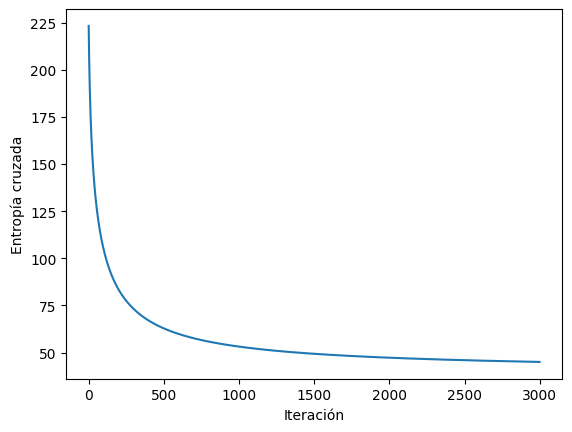

In [ ]:
plt.plot(ec)
plt.xlabel(u'Iteración')
plt.ylabel(u'Entropía cruzada')
plt.show()


In [ ]:
print('Exactitud en entrenamiento = {0}'.format(rl.score(new_X_train, Y_train)))
print('Exactitud en validación  = {0}'.format(rl.score(new_X_test, Y_test)))

Exactitud en entrenamiento = 0.9341692789968652
Exactitud en validación  = 0.7217391304347827


Ahora probaremos para diferentes valores de alpha para el modelo

In [ ]:
alphas = np.linspace(-1, 1, 21)
exactitud = []

for alph in alphas:
  rl = LogisticRegression(n_iter = 3000, alpha = alph)
  ec = rl.fit( np.array(new_X_train), np.array(Y_train) )
  exactitud.append( (rl.score(new_X_train, Y_train), rl.score(new_X_test, Y_test)) )

exactitud = np.array(exactitud)

exactitud = pd.DataFrame(exactitud, columns = ['Train', 'Test'])
exactitud['alphas'] = alphas
exactitud_sort = exactitud.sort_values(by = ['Test', 'Train'], ascending= False)
exactitud_sort

,Train,Test,alphas
16,0.924765,0.730435,0.6
17,0.921630,0.730435,0.7
14,0.931034,0.721739,0.4
20,0.931034,0.721739,1.0
18,0.921630,0.721739,0.8
10,0.529781,0.713043,0.0
15,0.924765,0.669565,0.5
11,0.918495,0.660870,0.1
19,0.880878,0.617391,0.9
13,0.868339,0.504348,0.3


Text(0.5, 1.0, 'Entrenamiento con diferentes alphas')

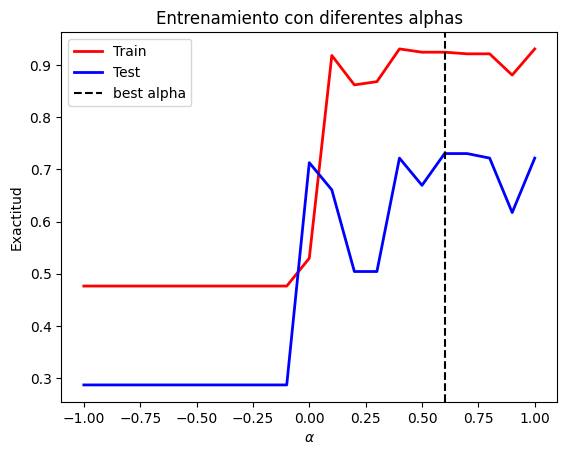

In [ ]:
best_alpha = exactitud_sort['alphas'].to_list()[0]

plt.plot(
    alphas,
    exactitud['Train'],
    color="red",
    label="Train",
    linewidth=2,
)

plt.plot(
    alphas,
    exactitud['Test'],
    color="blue",
    label="Test",
    linewidth=2,
)

plt.axvline(best_alpha, linestyle="--", color="black", label="best alpha")

plt.xlabel(r"$\alpha$")
plt.ylabel("Exactitud")
plt.legend()
plt.title("Entrenamiento con diferentes alphas")

In [ ]:
print("best_alpha: ", best_alpha)
print("Accuracy test: ", exactitud_sort['Test'].to_list()[0])
print("Accuracy train: ", exactitud_sort['Train'].to_list()[0])

best_alpha:  0.6000000000000001
Accuracy test:  0.7304347826086957
Accuracy train:  0.9247648902821317


## Grafica las curvas ROC y de precisión-exhaustividad y reporta sus áreas bajo la curva.

In [ ]:
n_iter = 4000    # Número de iteraciones
alpha = best_alpha    # Learning rate

LogR = LogisticRegression(n_iter, best_alpha)
LogR.fit(new_X_train, Y_train)
y_pred_proba = LogR.predict_proba(new_X_test)[:,1]
#rvps, rfps = roc(prob, Y_test)

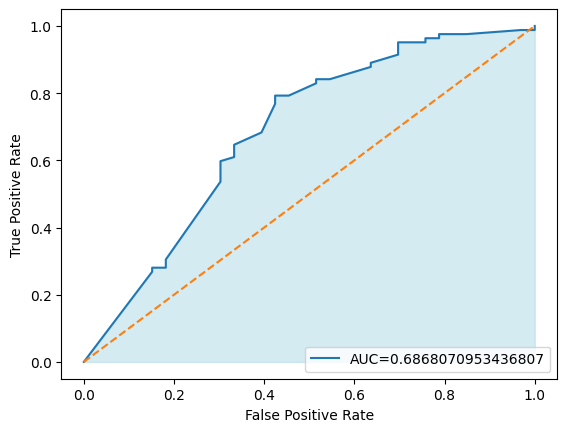

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve

plt.plot(fpr, tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], '--')
plt.fill_between(fpr, tpr, 0, alpha=0.5, color = 'lightblue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Area bajo la curva precision-recall: 0.8310485399446121


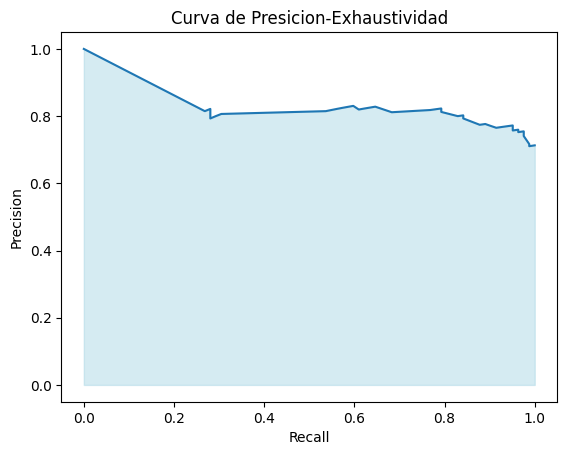

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_proba)
auc_precision_recall = metrics.auc(recall, precision)
print("Area bajo la curva precision-recall:",auc_precision_recall)
plt.title("Curva de Presicion-Exhaustividad")
plt.plot(recall, precision, label="AUC="+str(auc_precision_recall))
plt.fill_between(recall, precision, 0, alpha=0.5, color = 'lightblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Compara el clasificador bayesiano ingenuo y regresión logística en este problema.

* ¿Qué ventajas y desventajas tienen los modelos entrenados?

Una ventaja de Naive Bayes es que no es necesario reparametrizar los datos, basta con proponer una distribución que describa adecuadamente el problema, a diferencia de éste, además de que no es necesario hacer optimización si no calcula probabilidades con base en las observaciones. La regresión lógistica crece en cantidad de atributos al ser necesario reparametrizar. Naive Bayes calcula directamente a partir de las características con el objetivo de obtener una mayor perfección, pero da malos resultados si las características son más. No tiene en cuenta las calibraciones y si hay dependencia en las características, lo tendrá en cuenta y lo añadirá a la característica haciéndola más prominente. Si la característica tiene un impacto negativo, los resultados serán pobres. Esto no es un problema en la regresión logística, ya que la calibración de las características se produce a tiempo cuando las características se añaden más veces y se obtienen resultados exactos. Naïve bayes cuenta individualmente las clases y da un resultado basado en el mayor número de características de una clase en particular. Las clases se separan en la regresión logística, lo que permite identificar la característica más destacada en función de la calibración.


* ¿Qué pasaría si se entrena el clasificador bayesiano ingenuo con los vectores recodificados o si se entrena un modelo de regresión logística usando los vectores de entrada originales?

Si se entrenara un clasificador bayesiano ingenuo utilizando el conjunto de datos reparametrizado entonces cada atributo tendría sólo 2 clases, 0 o 1, y entonces nos convendría quizás utilizar otra distribución para modelarlo, como una distribución por Bernoulli. Por otro lado, si se entrenara el modelo de regresión logística usando los vectores de entrada originales, entonces el modelo asumiría que los jugadores tienen un cierto orden, pero en realidad, no hay una relación de orden entre los jugadores, es decir, el valor que los representa sólo es un identificador más no implica nada en el desempeño de cada uno al jugar, por lo tanto, no reparametrizar, agregaría información no coherente al modelo y podría producir resultados no adecuados ni generales.

* ¿Consideras que las presuposiciones de cada clasificador son apropiadas para los datos del problema?

Naive Bayes se utiliza sobre todo para clasificar datos de texto. Por ejemplo, para identificar si el buzón de correo tiene spam, este algoritmo puede utilizarse para encontrar correos spam basándose en algunos términos del correo. El texto del correo electrónico se toma como entrada y no hay características dependientes que deban tenerse en cuenta. La combinación lineal de las entradas se considera para obtener una salida binaria en la que las características dependientes o independientes no se consideran un punto para clasificar los datos.

Cuando el total de datos considerados es pequeño o la muestra de datos es menor, podemos hacer una mejor clasificación basada en el número de características que ayudan a obtener buenas probabilidades de los datos incluso antes del análisis de datos. Po otro lado, un menor número de datos no favorece a la regresión logística, ya que el resultado será un modelo más generalizado con las características disponibles. La sobreadaptación se reducirá con la ayuda de técnicas de regresión, pero el resultado no será el esperado y el análisis no ayudará a comprender los datos.

Naive Bayes tiene un sesgo más alto y una varianza baja. Los resultados se analizan para conocer la generación de datos, lo que facilita la predicción con menos variables y menos datos. Naive bayes da una solución más rápida para pocos conjuntos de entrenamiento mientras considera características independientes.

La regresión logística tiene un sesgo bajo y una varianza más alta. La forma funcional indirecta se utiliza para predecir la probabilidad con variables categóricas y continuas haciendo que el conjunto de resultados sea categórico. Cuando hay más clases, se utiliza la regresión logística multiclase para el análisis de datos.

Ambos clasificadores funcionan de manera similar, pero los supuestos considerados junto con el número de características difieren. Podemos realizar ambas clasificaciones en los mismos datos y comprobar el resultado para saber cómo funcionan los datos con ambas clasificaciones. Estos son los dos modelos estadísticos más utilizados en el aprendizaje automático.

* ¿Para este tipo de problemas cuál de los dos recomendarías y por qué?

A priori, yo recomendría usar naive Bayes con distribución categorica, poque no tenemos demasiadas observaciones. Una opción es generear partidas artificiales utilizando el clasificador bayesiano ingenuo para compensar el crecimiento de dimensionalidad por la reparametrización en el modelo por regresión logística.

# Deriva la regla de actualización para el algoritmo del descenso por gradiente de un clasificador donde $\hat{y}=\sigma(\theta^T X)$ y la función de pérdida sea:

\begin{equation}
	E(\theta) = \frac{1}{2} \sum_{i=1}^{n}{\left(\hat{y}^{(i)} - y^{(i)} \right)^2}
\end{equation}

Discute las diferencias entre este clasificador y el de regresión logística y compara sus rendimientos en la tarea de predicción de juegos.

In [ ]:
#redefinimos la función gradiente
def gradient(X, Y, Q):
    return X.T @  (np.power(Q,3) + ((1-Y)@Q) - (Y @ Q))


In [ ]:
alphas = np.geomspace(1e-20, 1e20, num=21)    # Learning rate
exactitud = []

for alph in alphas:
  rl = LogisticRegression(n_iter = 4000, alpha = alph)
  ec = rl.fit( np.array(new_X_train), np.array(Y_train) )
  exactitud.append( (rl.score(new_X_train, Y_train), rl.score(new_X_test, Y_test)) )

exactitud = np.array(exactitud)

exactitud = pd.DataFrame(exactitud, columns = ['Train', 'Test'])
exactitud['alphas'] = alphas
exactitud_sort = exactitud.sort_values(by = ['Test', 'Train'], ascending= False)
exactitud_sort

,Train,Test,alphas
10,0.924765,0.756522,1.000000e+00
17,0.924765,0.756522,1.000000e+14
9,0.934169,0.730435,1.000000e-02
13,0.934169,0.730435,1.000000e+06
11,0.924765,0.730435,1.000000e+02
15,0.924765,0.730435,1.000000e+10
20,0.924765,0.730435,1.000000e+20
12,0.934169,0.721739,1.000000e+04
14,0.934169,0.713043,1.000000e+08
8,0.865204,0.695652,1.000000e-04


Text(0.5, 1.0, 'Entrenamiento con diferentes alphas')

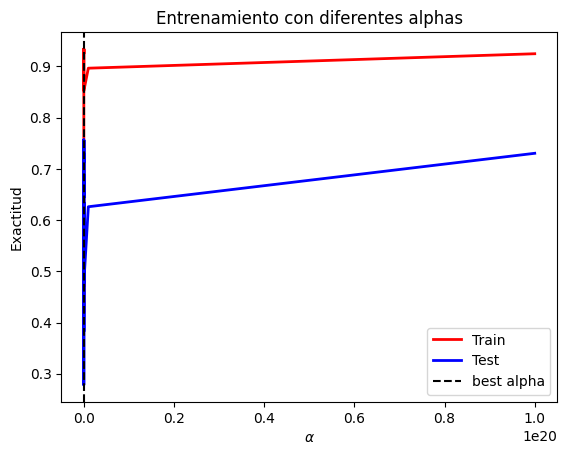

In [ ]:
best_alpha = exactitud_sort['alphas'].to_list()[0]

plt.plot(
    alphas,
    exactitud['Train'],
    color="red",
    label="Train",
    linewidth=2,
)

plt.plot(
    alphas,
    exactitud['Test'],
    color="blue",
    label="Test",
    linewidth=2,
)

plt.axvline(best_alpha, linestyle="--", color="black", label="best alpha")

plt.xlabel(r"$\alpha$")
plt.ylabel("Exactitud")
plt.legend()
plt.title("Entrenamiento con diferentes alphas")

In [ ]:
print("best_alpha: ", best_alpha)
print("Accuracy test: ", exactitud_sort['Test'].to_list()[0])
print("Accuracy train: ", exactitud_sort['Train'].to_list()[0])

best_alpha:  1.0
Accuracy test:  0.7565217391304347
Accuracy train:  0.9247648902821317


### Discusión

Podemos notar que al cambiar la ecuación del gradiente, se obtuvo un mejor resultado para el conjunto de entrenamiento pero se mantuvo la exactitud con respecto al conjunto de validación que para el modelo de regresión logística entrenado anteriormente.

Aunque se tuvo un mejor resultado con este modelo, l
a complejidad y mantenibilidad del código puede ser afectada debido a que la ecuación es de un orden mayor. Sin embargo, con numpy la implementación fue bastante sencilla.